#### <i> AI Driven Predictive Modeling for Banking Customer Churn Insights for the US Financial Sector </i>
#### <i> Dataset Link ---> https://www.kaggle.com/datasets/sudenazonaran/banking-customer-churn-prediction-dataset </i>
#### <i> Import Library Files </i>

In [27]:
import pandas as pd
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')


#### <i> Load The Dataset </i>

In [28]:
data = pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#### <i> Dataset Overview </i>

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [30]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### <i> Data Visulization And Analysis </i>

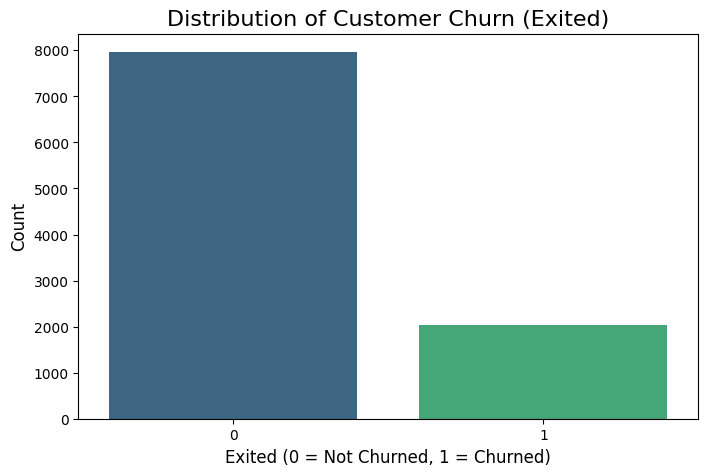

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the Target Variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', data=data, palette='viridis')
plt.title('Distribution of Customer Churn (Exited)', fontsize=16)
plt.xlabel('Exited (0 = Not Churned, 1 = Churned)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

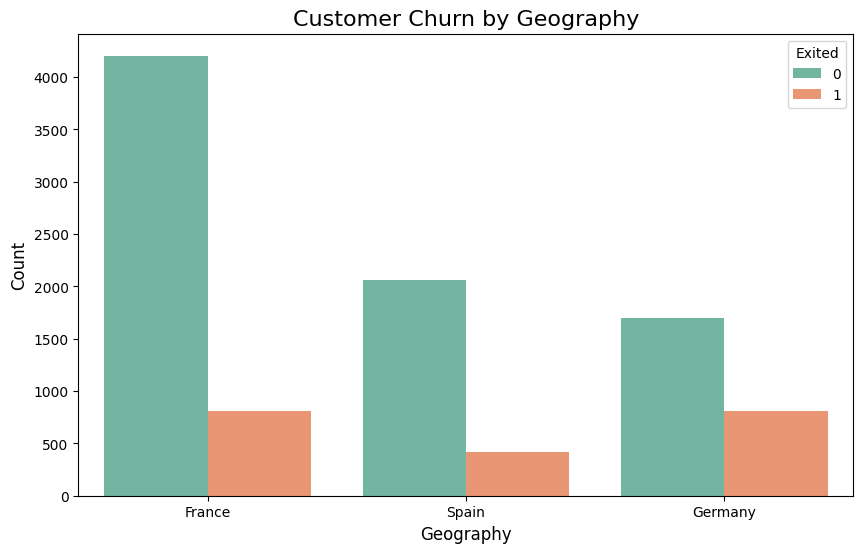

In [32]:
# Geography vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', hue='Exited', data=data, palette='Set2')
plt.title('Customer Churn by Geography', fontsize=16)
plt.xlabel('Geography', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

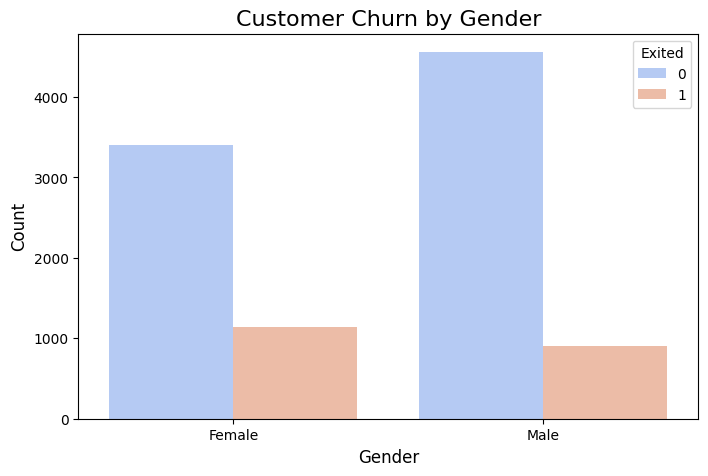

In [33]:
# Gender vs Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Exited', data=data, palette='coolwarm')
plt.title('Customer Churn by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


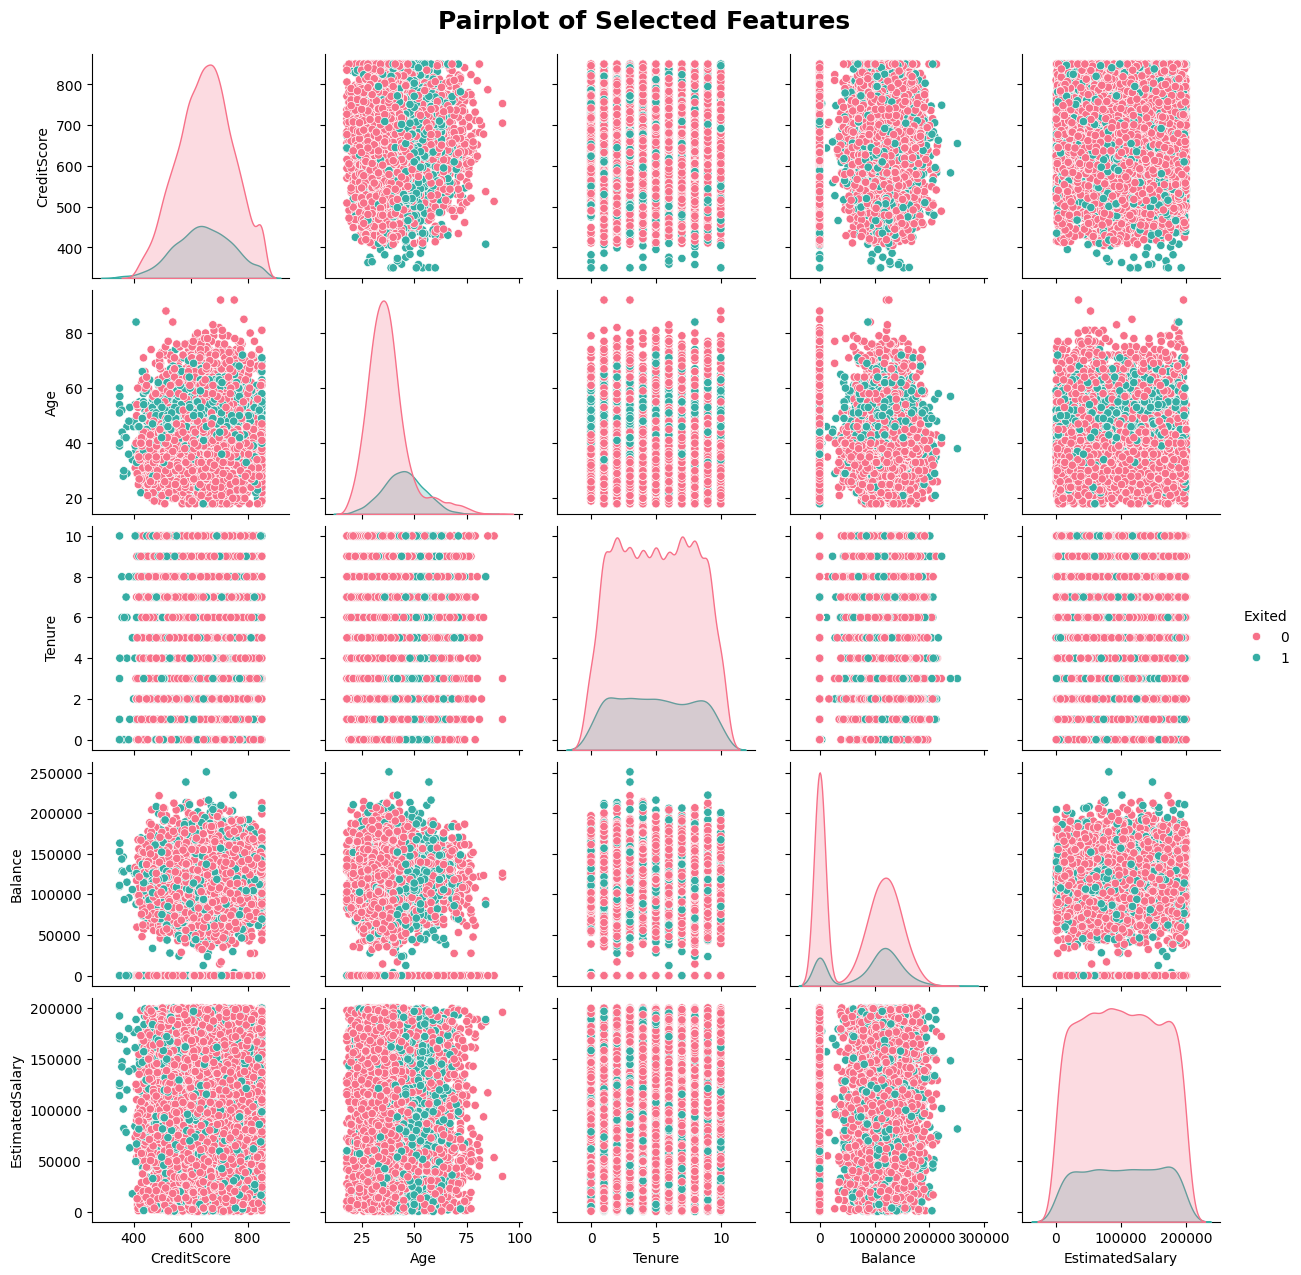

In [34]:
# Pairplot for Selected Features
selected_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Exited']
sns.pairplot(data[selected_features], hue='Exited', palette='husl', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02, fontsize=18, fontweight='bold')
plt.show()


#### <i> Data Preprocessing </i>

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Drop unnecessary columns
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Separate features and target
X = data.drop('Exited', axis=1)
y = data['Exited']

# Identify categorical and numerical columns
categorical_columns = ['Geography', 'Gender']
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Create preprocessing steps
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Convert preprocessed data back to a DataFrame
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed)

#### <i> Modeling </i>
#### <i> Logistic Regression </i>

In [36]:
# Model 1: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train_preprocessed, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test_preprocessed)

# Evaluate the model
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))

Logistic Regression Results:
Accuracy: 0.811
Confusion Matrix:
 [[1543   64]
 [ 314   79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



#### <i> Random Forest Classifier </i>

In [37]:
# Model 2: Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_preprocessed, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_preprocessed)

# Evaluate the model
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.8635
Confusion Matrix:
 [[1545   62]
 [ 211  182]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



#### <i> XGBClassifier </i>

In [38]:
# Model 3: XGBoost
from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train_preprocessed, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_preprocessed)

# Evaluate the model
print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Results:
Accuracy: 0.8625
Confusion Matrix:
 [[1523   84]
 [ 191  202]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



#### <i> Compare Moddel Performance </i>


Model Performance Comparison:
                 Model  Accuracy
0  Logistic Regression    0.8110
1        Random Forest    0.8635
2              XGBoost    0.8625


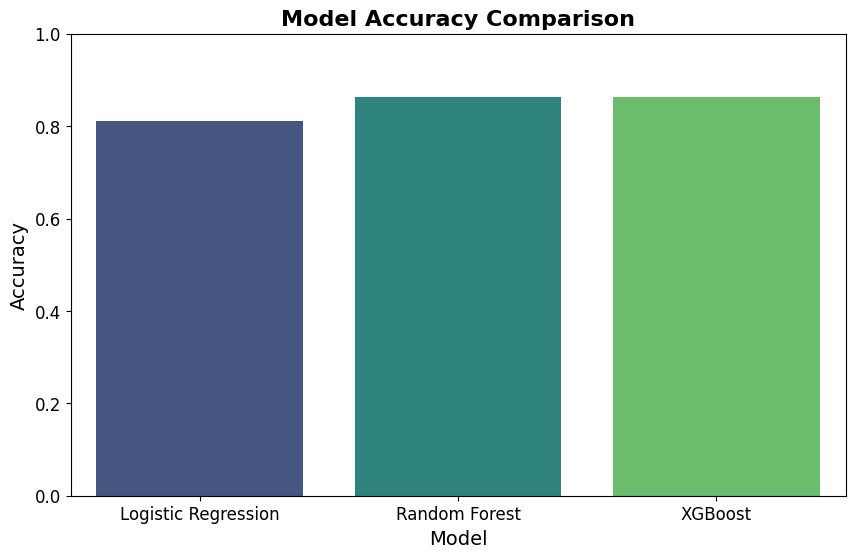

In [39]:
# Compare Model Performance
print("\nModel Performance Comparison:")
results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_logistic),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb),
    ]
}

comparison_df = pd.DataFrame(results)
print(comparison_df)

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=comparison_df, palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=16, fontweight="bold")
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
